# Landscape Learning - Discrete Age Groups Statistical Tests

In [71]:
# Dave Hunt
# University of Washington
# December 16, 2021

# This notebook runs regression analysis and statistical tests on the Dlist and Olist ranked lists produced to
# test Discoverability of toolstone sources surrounding the Old River Bed delta archaeological sites.

#  Discoverability/ 
#    │
#    │
#    ├──notebooks/
#    │   └── Landscape Learning - D Groups statistical tests.ipynb
#    │   │
#    │   └── Landscape Learning - C Groups statistical tests.ipynb
#    │
#    │──shapefiles/
#    │
#    └──Excel/
#
# Copyright (c) 2021, David Hunt
# All rights reserved.

# This source code is licensed under the BSD-style license found in the
# LICENSE file in the root directory of this source tree. 

This notebook is used to perform linear regression on the Discrete Age groups Dlist and Olist data created in the associated Excel spreadsheet. In this notebook, simple linear regression is run on the Dlist and Olist data to ensure 
its statistical validity.  The results are then used to produce the %LL value for each group.  These %LL values are plotted over time to gauge landscape learning over the time of the Paleoindian occupation of the Old River Bed delta in Utah, USA

In [2]:
# included Python libraries
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.sandbox.stats.runs import runstest_1samp 

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker

import scipy as scipy
from scipy import stats
from scipy.stats import shapiro

import numpy as np
import pandas as pd

In [3]:
# function that returns a line with equation mx+b 
def linear(x, m, b):
    return m*x + b

In [4]:
# The D group (D1, D2, D3) Dlists (expected rank orders)
d1_dlist = np.array([1,15,6,2,5,11,4,13,7,12,16,10,8,9,14,3])
d2_dlist = np.array([2,15,6,3,5,11,4,13,7,12,16,9,8,10,14,1])
d3_dlist = np.array([1,15,6,3,4,11,5,13,7,12,16,10,8,9,14,2])

# The D Group Olists (actual/observed artifact counts)
d1_olist = pd.Series([14,0,5,23,6,2,7,0,117,0,3,3,1,0,0,48])
d2_olist = pd.Series([0,0,2,11,0,1,1,0,20,0,0,2,1,0,1,32])
d3_olist = pd.Series([1,1,2,11,2,0,1,0,38,0,0,3,0,1,1,37])

In [5]:
d1_olist_rank = d1_olist.rank(ascending = False)
d2_olist_rank = d2_olist.rank(ascending = False)
d3_olist_rank = d3_olist.rank(ascending = False)

#print(d1_olist_rank)
#print(d2_olist_rank)
#print(d3_olist_rank)

In [6]:
# Compare the Dlist and Olist pair for each D group using Pearson's product moment correlation
d1_pearson_r, d1_pearson_r_pval = stats.pearsonr(d1_olist_rank, d1_dlist)
print("D1 Pearson's r:          ", str(round(d1_pearson_r, 3)))
print("D1 Pearson's r, p value: ", str(round(d1_pearson_r_pval, 4)))
print("--------------------------------")
d2_pearson_r, d2_pearson_r_pval = stats.pearsonr(d2_olist_rank, d2_dlist)
print("D2 Pearson's r:          ", str(round(d2_pearson_r, 3)))
print("D2 Pearson's r, p value: ", str(round(d2_pearson_r_pval, 3)))
print("--------------------------------")
d3_pearson_r, d3_pearson_r_pval = stats.pearsonr(d3_olist_rank, d3_dlist)
print("D3 Pearson's r:          ", str(round(d3_pearson_r, 3)))
print("D3 Pearson's r, p value: ", str(round(d3_pearson_r_pval, 3)))

D1 Pearson's r:           0.777
D1 Pearson's r, p value:  0.0004
--------------------------------
D2 Pearson's r:           0.502
D2 Pearson's r, p value:  0.048
--------------------------------
D3 Pearson's r:           0.592
D3 Pearson's r, p value:  0.016


In [27]:
# Compare the Dlist and Olist pair for each D group using Spearmans's rank-order correlation
d1_spearman_r, d1_spearman_r_pval = stats.spearmanr(d1_olist_rank, d1_dlist)
print("D1 Spearman's r:          ", str(round(d1_spearman_r, 3)))
print("D1 Spearman's r, p value: ", str(round(d1_spearman_r_pval, 4)))
print("--------------------------------")
d2_spearman_r, d2_spearman_r_pval = stats.spearmanr(d2_olist_rank, d2_dlist)
print("D2 Spearman's r:          ", str(round(d2_spearman_r, 3)))
print("D2 Spearman's r, p value: ", str(round(d2_spearman_r_pval, 3)))
print("--------------------------------")
d3_spearman_r, d3_spearman_r_pval = stats.spearmanr(d3_olist_rank, d3_dlist)
print("D3 Spearman's r:          ", str(round(d3_spearman_r, 3)))
print("D3 Spearman's r, p value: ", str(round(d3_spearman_r_pval, 3)))

D1 Spearman's r:           0.777
D1 Spearman's r, p value:  0.0004
--------------------------------
D2 Spearman's r:           0.502
D2 Spearman's r, p value:  0.048
--------------------------------
D3 Spearman's r:           0.592
D3 Spearman's r, p value:  0.016


In [28]:
# Form the lists into a Pandas dataframe

d1_dlist = np.array([1,15,6,2,5,11,4,13,7,12,16,10,8,9,14,3]).reshape((-1, 1))
d2_dlist = np.array([2,15,6,3,5,11,4,13,7,12,16,9,8,10,14,1]).reshape((-1, 1))
d3_dlist = np.array([1,15,6,3,4,11,5,13,7,12,16,10,8,9,14,2]).reshape((-1, 1))

d1_x = list(np.concatenate(d1_dlist).flat)
d2_x = list(np.concatenate(d2_dlist).flat)
d3_x = list(np.concatenate(d3_dlist).flat)
print(d1_x)

d1_y = d1_olist_rank.tolist()
d2_y = d2_olist_rank.tolist()
d3_y = d3_olist_rank.tolist()
print(d1_y)

#create dataset
D_df = pd.DataFrame({'d1_x': d1_x,
                     'd1_y': d1_y,
                     'd2_x': d2_x,
                     'd2_y': d2_y,
                     'd3_x': d3_x,
                     'd3_y': d3_y})
#view dataset
D_df

[1, 15, 6, 2, 5, 11, 4, 13, 7, 12, 16, 10, 8, 9, 14, 3]
[4.0, 14.0, 7.0, 3.0, 6.0, 10.0, 5.0, 14.0, 1.0, 14.0, 8.5, 8.5, 11.0, 14.0, 14.0, 2.0]


,d1_x,d1_y,d2_x,d2_y,d3_x,d3_y
0,1,4.0,2,13.0,1,9.0
1,15,14.0,15,13.0,15,9.0
2,6,7.0,6,4.5,6,5.5
3,2,3.0,3,3.0,3,3.0
4,5,6.0,5,13.0,4,5.5
5,11,10.0,11,7.5,11,14.0
6,4,5.0,4,7.5,5,9.0
7,13,14.0,13,13.0,13,14.0
8,7,1.0,7,2.0,7,1.0
9,12,14.0,12,13.0,12,14.0


## Run regression on each group

In [29]:
#fit multiple linear regression model
D1_model = ols('d1_y ~ d1_x', data=D_df).fit()
print(D1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   d1_y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     21.30
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           0.000401
Time:                        10:46:03   Log-Likelihood:                -39.504
No. Observations:                  16   AIC:                             83.01
Df Residuals:                      14   BIC:                             84.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0000      1.602      1.248      0.2

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [30]:
#fit multiple linear regression model
D2_model = ols('d2_y ~ d2_x', data=D_df).fit()
print(D2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   d2_y   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     4.713
Date:                Thu, 16 Dec 2021   Prob (F-statistic):             0.0476
Time:                        10:46:04   Log-Likelihood:                -44.003
No. Observations:                  16   AIC:                             92.01
Df Residuals:                      14   BIC:                             93.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4500      2.122      2.097      0.0

In [31]:
#fit multiple linear regression model
D3_model = ols('d3_y ~ d3_x', data=D_df).fit()
print(D3_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   d3_y   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     7.540
Date:                Thu, 16 Dec 2021   Prob (F-statistic):             0.0158
Time:                        10:46:04   Log-Likelihood:                -43.210
No. Observations:                  16   AIC:                             90.42
Df Residuals:                      14   BIC:                             91.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6250      2.020      1.795      0.0

slope = 0.76 (+/-) 0.17
y-intercept = 2.00 (+/-) 1.60


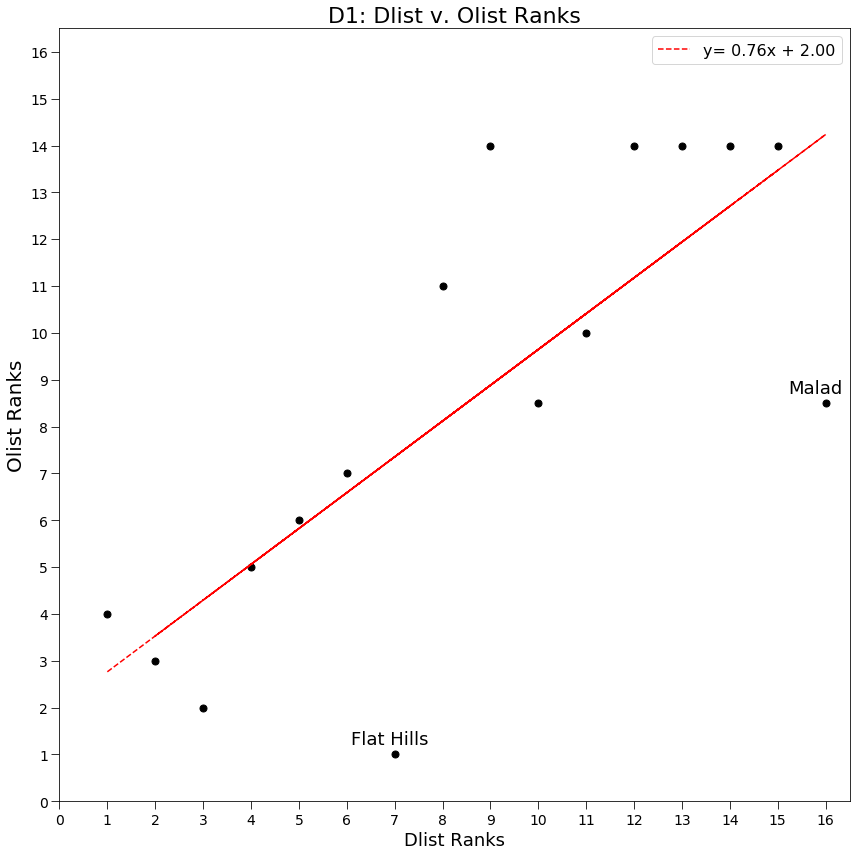

In [32]:
# D1 Dlist v Olist
# fits the data to a line and plots it
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(D_df.d1_x, D_df.d1_y, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, D_df.d1_x, D_df.d1_y)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(D_df.d1_x, linear(D_df.d1_x, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))
ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("D1: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()

plt.annotate("Malad",               # this is the text
        (16,8.5),                   # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        size=18,
        xytext=(-10,10),            # distance from text to points (x,y)
        ha='center')                # horizontal alignment can be left, right or center    

plt.annotate("Flat Hills",          # this is the text
        (7,1),                      # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        size=18,
        xytext=(-5,10),             # distance from text to points (x,y)
        ha='center')                # horizontal alignment can be left, right or center
    
plt.savefig('D1 regression chart.png')

slope = 0.48 (+/-) 0.22
y-intercept = 4.45 (+/-) 2.12


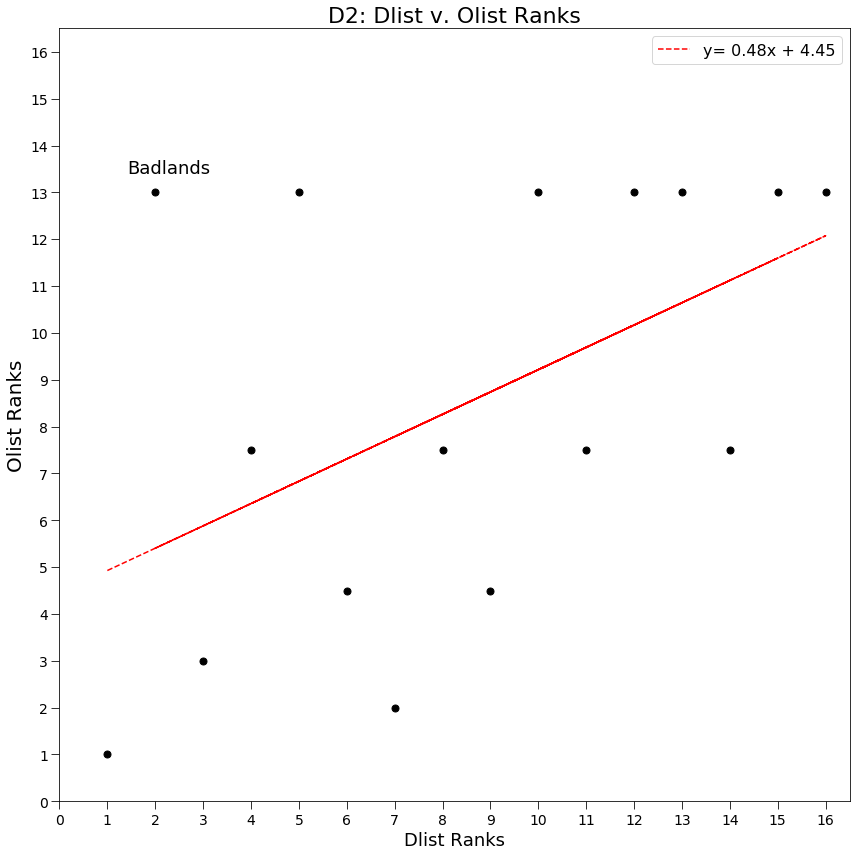

In [33]:
# D2 Dlist v Olist
# fits the data to a line and plots it   
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(D_df.d2_x, D_df.d2_y, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, D_df.d2_x, D_df.d2_y)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(D_df.d1_x, linear(D_df.d1_x, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))
ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("D2: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()

plt.annotate("Badlands",            # this is the text
        (2.5,13.2),                 # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        size=18,
        xytext=(-10,10),            # distance from text to points (x,y)
        ha='center')                # horizontal alignment can be left, right or center    
    
plt.savefig('D2 regression chart.png')

slope = 0.57 (+/-) 0.21
y-intercept = 3.63 (+/-) 2.02


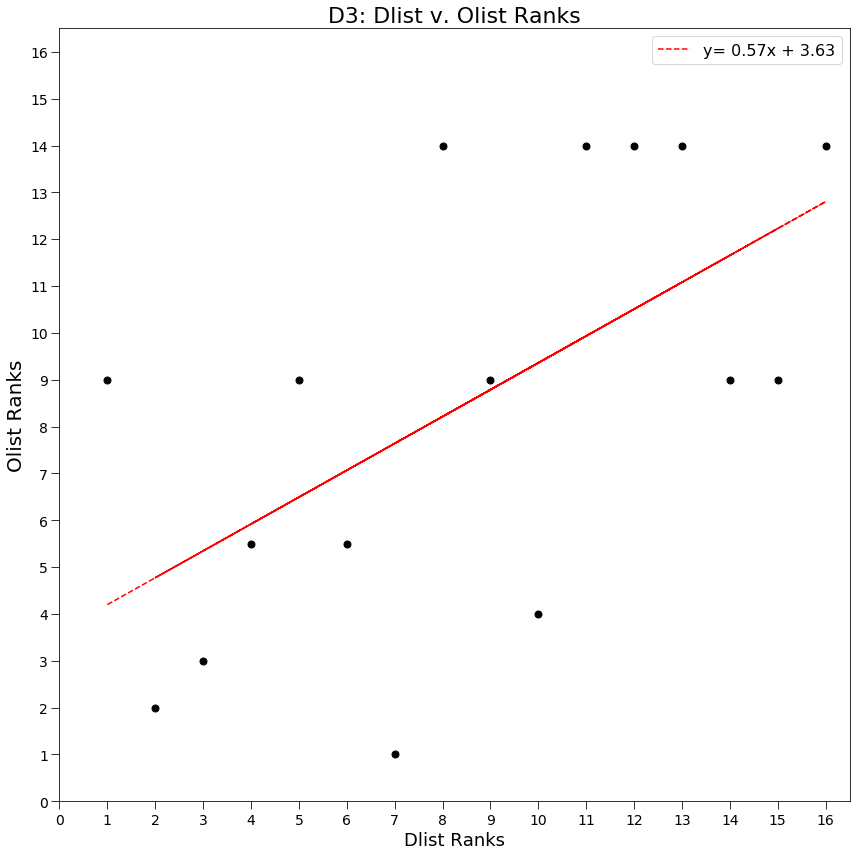

In [34]:
# D3 Dlist v Olist
# fits the data to a line and plots it
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(D_df.d3_x, D_df.d3_y, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, D_df.d3_x, D_df.d3_y)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(D_df.d1_x, linear(D_df.d1_x, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))
ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("D3: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()  
plt.savefig('D3 regression chart.png')

In [35]:
# get the standardized residuals 
D1_influence = D1_model.get_influence()
D1_standardized_residuals = D1_influence.resid_studentized_internal
#print(D1_standardized_residuals)

D2_influence = D2_model.get_influence()
D2_standardized_residuals = D2_influence.resid_studentized_internal
#print(D2_standardized_residuals)

D3_influence = D3_model.get_influence()
D3_standardized_residuals = D3_influence.resid_studentized_internal
#print(D3_standardized_residuals)

No handles with labels found to put in legend.


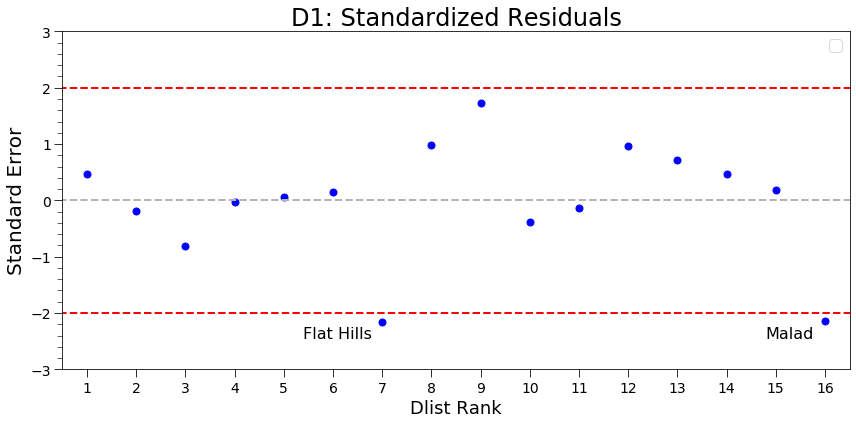

In [36]:
# D1 standardized residuals plot
sres_fig = plt.figure(figsize=(12,6))
gs = GridSpec(1,1)
ax1 = sres_fig.add_subplot(gs[0])

ax1.plot(D_df.d1_x,D1_standardized_residuals, "bo", markersize=7)    
ax1.plot([0, 16.5], [0, 0], color='0.7', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [2, 2], color='r', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [-2, -2], color='r', linestyle='--', linewidth=2)

ax1.set_xlim(0.5,16.5)
ax1.set_ylim(-3.0,3.0)

ax1.set_title("D1: Standardized Residuals", fontsize=24)
ax1.set_xlabel("Dlist Rank",  fontsize=18)
ax1.set_ylabel("Standard Error",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

sres_fig.tight_layout()

plt.annotate("Flat Hills",          
        (7,-2.1), 
        textcoords="offset points", 
        size=16,
        xytext=(-45,-20),
        ha='center')    

plt.annotate("Malad", 
        (16,-2.1), 
        textcoords="offset points", 
        size=16,
        xytext=(-35,-20), 
        ha='center') 

plt.savefig('D1 stdres.png')

No handles with labels found to put in legend.


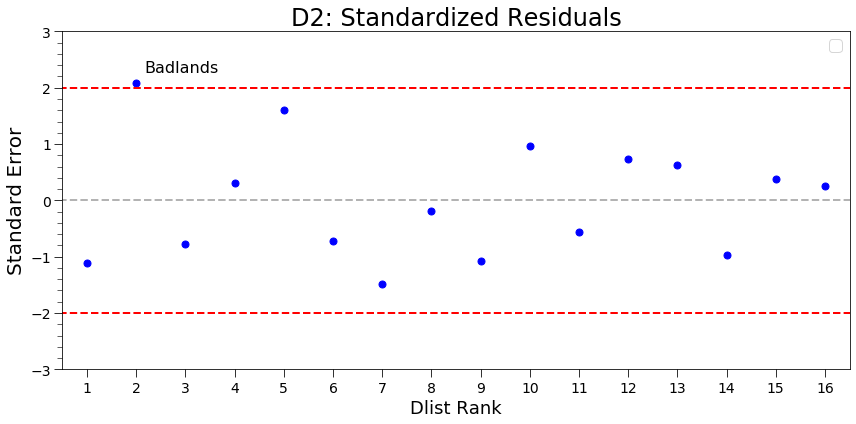

In [37]:
# D2 standardized residuals plot
sres_fig = plt.figure(figsize=(12,6))
gs = GridSpec(1,1)
ax1 = sres_fig.add_subplot(gs[0])

ax1.plot(D_df.d2_x,D2_standardized_residuals, "bo", markersize=7)    
ax1.plot([0, 16.5], [0, 0], color='0.7', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [2, 2], color='r', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [-2, -2], color='r', linestyle='--', linewidth=2)

ax1.set_xlim(0.5,16.5)
ax1.set_ylim(-3.0,3.0)

ax1.set_title("D2: Standardized Residuals", fontsize=24)
ax1.set_xlabel("Dlist Rank",  fontsize=18)
ax1.set_ylabel("Standard Error",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

sres_fig.tight_layout()

plt.annotate("Badlands", 
        (2,2.1), 
        textcoords="offset points", 
        size=16,
        xytext=(+45,+10), 
        ha='center')    

plt.savefig('D2 stdres.png')

No handles with labels found to put in legend.


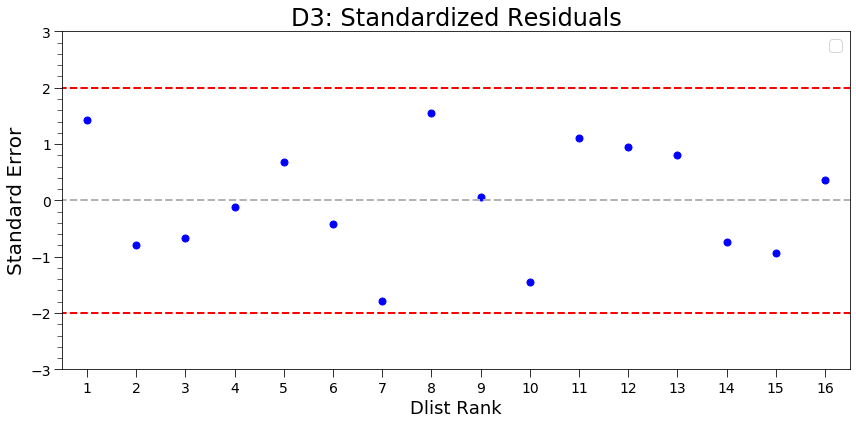

In [38]:
# D3 standardized residuals plot
sres_fig = plt.figure(figsize=(12,6))
gs = GridSpec(1,1)
ax1 = sres_fig.add_subplot(gs[0])

ax1.plot(D_df.d3_x,D3_standardized_residuals, "bo", markersize=7)    
ax1.plot([0, 16.5], [0, 0], color='0.7', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [2, 2], color='r', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [-2, -2], color='r', linestyle='--', linewidth=2)

ax1.set_xlim(0.5,16.5)
ax1.set_ylim(-3.0,3.0)

ax1.set_title("D3: Standardized Residuals", fontsize=24)
ax1.set_xlabel("Dlist Rank",  fontsize=18)
ax1.set_ylabel("Standard Error",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

sres_fig.tight_layout()

plt.savefig('D3 stdres.png')

### Statistical Tests on the Standardized Residuals

In [39]:
print('\033[1m' +"D1 Tests for Standardized Residual Normality" + '\033[0m')
alpha = 0.05
print("Ho (null): The data was produced in a random manner.")
print("Ha (alternative): The data was not produced in a random manner.")
print("  Reject the null hypothesis if p < alpha")
print(' ')

#Perform Runs test
print('\033[1m' + 'Runs Test' + '\033[0m')
print("Purpose: detect non-randomness")
runs_stdRes_zStat, runs_stdRes_zpval = runstest_1samp(D1_standardized_residuals, correction=False)
print('  Test Statistics=%.3f, p=%.3f' % (runs_stdRes_zStat, runs_stdRes_zpval))
if runs_stdRes_zpval > alpha:
    print("  Data appears random (failed to reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
else:
    print("  Data appears non-random (reject Ho)".format(round(runs_pval,4), alpha))
print("-----------------------------------------------------------------")

lil_stdRes_zstat,lil_stdRes_zp = sm.stats.lilliefors(D1_standardized_residuals)
print('\033[1m' + 'Lilliefors Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when pop mean and std dev not known")
print('  Test Statistics=%.3f, p=%.3f' % (lil_stdRes_zstat, lil_stdRes_zp))
if lil_stdRes_zp > alpha:
	print('  D1 residuals look normal (failed to reject Ho)')
else:
	print('  D1 residuals do not look normal (reject Ho)')

print('----------------------------------------------')

# Shapiro-Wilk Test
print('\033[1m' + 'Shapiro-Wilk Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when small sample sizes (<50)")
shap_stdres_stat, shap_stdres_p = shapiro(D1_standardized_residuals)
print('  Test Statistics=%.3f, p=%.3f' % (shap_stdres_stat, shap_stdres_p))
# interpret
if shap_stdres_p > alpha:
	print('  D1 residuals look normal (failed to reject Ho)')
else:
	print('  D1 residuals do not look normal (reject Ho)')

ks_stdRes_zstat,ks_stdRes_zp = sm.stats.diagnostic.kstest_normal(D1_standardized_residuals)
print('\033[1m' + 'Kolmogorov-Smirnov Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (ks_stdRes_zstat, ks_stdRes_zp))
if ks_stdRes_zp > alpha:
	print('  D1 residuals look normal (failed to reject Ho)')
else:
	print('  D1 residuals do not look normal (reject Ho)') 

print('----------------------------------------------')    
    
jb_stdres_stat,jb_stdres_p, xx, yy = sm.stats.stattools.jarque_bera(D1_standardized_residuals)
print('\033[1m' + 'Jarque-Bera Test' + '\033[0m')
print("Purpose: goodness-of-fit test of data's skewness and kurtosis to a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (jb_stdres_stat, jb_stdres_p))
if jb_stdres_p > alpha:
	print('  D1 residuals look normal (failed to reject Ho)')
else:
	print('  D1 residuals do not look normal (reject Ho)')

print('----------------------------------------------')  
    
    

D1 Tests for Standardized Residual Normality
Ho (null): The data was produced in a random manner.
Ha (alternative): The data was not produced in a random manner.
  Reject the null hypothesis if p < alpha
 
Runs Test
Purpose: detect non-randomness
  Test Statistics=0.592, p=0.554
  Data appears random (failed to reject Ho)
-----------------------------------------------------------------
Lilliefors Test
Purpose: test that data come from a normal distribution when pop mean and std dev not known
  Test Statistics=0.179, p=0.190
  D1 residuals look normal (failed to reject Ho)
----------------------------------------------
Shapiro-Wilk Test
Purpose: test that data come from a normal distribution when small sample sizes (<50)
  Test Statistics=0.915, p=0.141
  D1 residuals look normal (failed to reject Ho)
Kolmogorov-Smirnov Test
Purpose: test that data come from a normal distribution
  Test Statistics=0.179, p=0.190
  D1 residuals look normal (failed to reject Ho)
-------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


In [40]:
print('\033[1m' +"D2 Tests for Standardized Residual Normality" + '\033[0m')
alpha = 0.05
print("Ho (null): The data was produced in a random manner.")
print("Ha (alternative): The data was not produced in a random manner.")
print("  Reject the null hypothesis if p < alpha")
print(' ')

#Perform Runs test
print('\033[1m' + 'Runs Test' + '\033[0m')
print("Purpose: detect non-randomness")
runs_stdRes_zStat, runs_stdRes_zpval = runstest_1samp(D2_standardized_residuals, correction=False)
print('  Test Statistics=%.3f, p=%.3f' % (runs_stdRes_zStat, runs_stdRes_zpval))
if runs_stdRes_zpval > alpha:
    print("  Data appears random (failed to reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
else:
    print("  Data appears non-random (reject Ho)".format(round(runs_pval,4), alpha))
print("-----------------------------------------------------------------")

lil_stdRes_zstat,lil_stdRes_zp = sm.stats.lilliefors(D2_standardized_residuals)
print('\033[1m' + 'Lilliefors Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when pop mean and std dev not known")
print('  Test Statistics=%.3f, p=%.3f' % (lil_stdRes_zstat, lil_stdRes_zp))
if lil_stdRes_zp > alpha:
	print('  D1 residuals look normal (failed to reject Ho)')
else:
	print('  D1 residuals do not look normal (reject Ho)')

print('----------------------------------------------')

# Shapiro-Wilk Test
print('\033[1m' + 'Shapiro-Wilk Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when small sample sizes (<50)")
shap_stdres_stat, shap_stdres_p = shapiro(D2_standardized_residuals)
print('  Test Statistics=%.3f, p=%.3f' % (shap_stdres_stat, shap_stdres_p))
# interpret
if shap_stdres_p > alpha:
	print('  D1 residuals look normal (failed to reject Ho)')
else:
	print('  D1 residuals do not look normal (reject Ho)')

ks_stdRes_zstat,ks_stdRes_zp = sm.stats.diagnostic.kstest_normal(D2_standardized_residuals)
print('\033[1m' + 'Kolmogorov-Smirnov Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (ks_stdRes_zstat, ks_stdRes_zp))
if ks_stdRes_zp > alpha:
	print('  D1 residuals look normal (failed to reject Ho)')
else:
	print('  D1 residuals do not look normal (reject Ho)') 

print('----------------------------------------------')    
    
jb_stdres_stat,jb_stdres_p, xx, yy = sm.stats.stattools.jarque_bera(D2_standardized_residuals)
print('\033[1m' + 'Jarque-Bera Test' + '\033[0m')
print("Purpose: goodness-of-fit test of data's skewness and kurtosis to a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (jb_stdres_stat, jb_stdres_p))
if jb_stdres_p > alpha:
	print('  D1 residuals look normal (failed to reject Ho)')
else:
	print('  D1 residuals do not look normal (reject Ho)')

print('----------------------------------------------') 

D2 Tests for Standardized Residual Normality
Ho (null): The data was produced in a random manner.
Ha (alternative): The data was not produced in a random manner.
  Reject the null hypothesis if p < alpha
 
Runs Test
Purpose: detect non-randomness
  Test Statistics=0.518, p=0.605
  Data appears random (failed to reject Ho)
-----------------------------------------------------------------
Lilliefors Test
Purpose: test that data come from a normal distribution when pop mean and std dev not known
  Test Statistics=0.146, p=0.472
  D1 residuals look normal (failed to reject Ho)
----------------------------------------------
Shapiro-Wilk Test
Purpose: test that data come from a normal distribution when small sample sizes (<50)
  Test Statistics=0.953, p=0.531
  D1 residuals look normal (failed to reject Ho)
Kolmogorov-Smirnov Test
Purpose: test that data come from a normal distribution
  Test Statistics=0.146, p=0.472
  D1 residuals look normal (failed to reject Ho)
-------------------------

In [70]:
print('\033[1m' +"D3 Tests for Standardized Residual Normality" + '\033[0m')
alpha = 0.05
print("Ho (null): The data was produced in a random manner.")
print("Ha (alternative): The data was not produced in a random manner.")
print("  Reject the null hypothesis if p < alpha")
print(' ')

#Perform Runs test
print('\033[1m' + 'Runs Test' + '\033[0m')
print("Purpose: detect non-randomness")
runs_stdRes_zStat, runs_stdRes_zpval = runstest_1samp(D3_standardized_residuals, correction=False)
print('  Test Statistics=%.3f, p=%.3f' % (runs_stdRes_zStat, runs_stdRes_zpval))
if runs_stdRes_zpval > alpha:
    print("  Data appears random (failed to reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
else:
    print("  Data appears non-random (reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
print("-----------------------------------------------------------------")

lil_stdRes_zstat,lil_stdRes_zp = sm.stats.lilliefors(D3_standardized_residuals)
print('\033[1m' + 'Lilliefors Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when pop mean and std dev not known")
print('  Test Statistics=%.3f, p=%.3f' % (lil_stdRes_zstat, lil_stdRes_zp))
if lil_stdRes_zp > alpha:
	print('  D1 residuals look normal (failed to reject Ho)')
else:
	print('  D1 residuals do not look normal (reject Ho)')

print('----------------------------------------------')

# Shapiro-Wilk Test
print('\033[1m' + 'Shapiro-Wilk Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when small sample sizes (<50)")
shap_stdres_stat, shap_stdres_p = shapiro(D3_standardized_residuals)
print('  Test Statistics=%.3f, p=%.3f' % (shap_stdres_stat, shap_stdres_p))
# interpret
if shap_stdres_p > alpha:
	print('  D1 residuals look normal (failed to reject Ho)')
else:
	print('  D1 residuals do not look normal (reject Ho)')

ks_stdRes_zstat,ks_stdRes_zp = sm.stats.diagnostic.kstest_normal(D3_standardized_residuals)
print('\033[1m' + 'Kolmogorov-Smirnov Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (ks_stdRes_zstat, ks_stdRes_zp))
if ks_stdRes_zp > alpha:
	print('  D1 residuals look normal (failed to reject Ho)')
else:
	print('  D1 residuals do not look normal (reject Ho)') 

print('----------------------------------------------')    
    
jb_stdres_stat,jb_stdres_p, xx, yy = sm.stats.stattools.jarque_bera(D3_standardized_residuals)
print('\033[1m' + 'Jarque-Bera Test' + '\033[0m')
print("Purpose: goodness-of-fit test of data's skewness and kurtosis to a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (jb_stdres_stat, jb_stdres_p))
if jb_stdres_p > alpha:
	print('  D1 residuals look normal (failed to reject Ho)')
else:
	print('  D1 residuals do not look normal (reject Ho)')

print('----------------------------------------------') 

D3 Tests for Standardized Residual Normality
Ho (null): The data was produced in a random manner.
Ha (alternative): The data was not produced in a random manner.
  Reject the null hypothesis if p < alpha
 
Runs Test
Purpose: detect non-randomness
  Test Statistics=-0.518, p=0.605
  Data appears random (failed to reject Ho)
-----------------------------------------------------------------
Lilliefors Test
Purpose: test that data come from a normal distribution when pop mean and std dev not known
  Test Statistics=0.123, p=0.741
  D1 residuals look normal (failed to reject Ho)
----------------------------------------------
Shapiro-Wilk Test
Purpose: test that data come from a normal distribution when small sample sizes (<50)
  Test Statistics=0.961, p=0.678
  D1 residuals look normal (failed to reject Ho)
Kolmogorov-Smirnov Test
Purpose: test that data come from a normal distribution
  Test Statistics=0.123, p=0.741
  D1 residuals look normal (failed to reject Ho)
------------------------

## Plot the Landscape Learning results

%LL = (1 - r^2)   Calculations and group ages are described in my dissertation, Chapter 5

In [42]:
D_LL = [65.0, 74.8, 39.6]
D_dates = [9300, 10050, 10650]

#create dataset
Dgrp_df = pd.DataFrame({'D_LL': D_LL,
                     'D_dates': D_dates})
#view dataset
Dgrp_df

,D_LL,D_dates
0,65.0,9300
1,74.8,10050
2,39.6,10650


slope = -0.02 (+/-) 0.02
y-intercept = 234.88 (+/-) 203.99


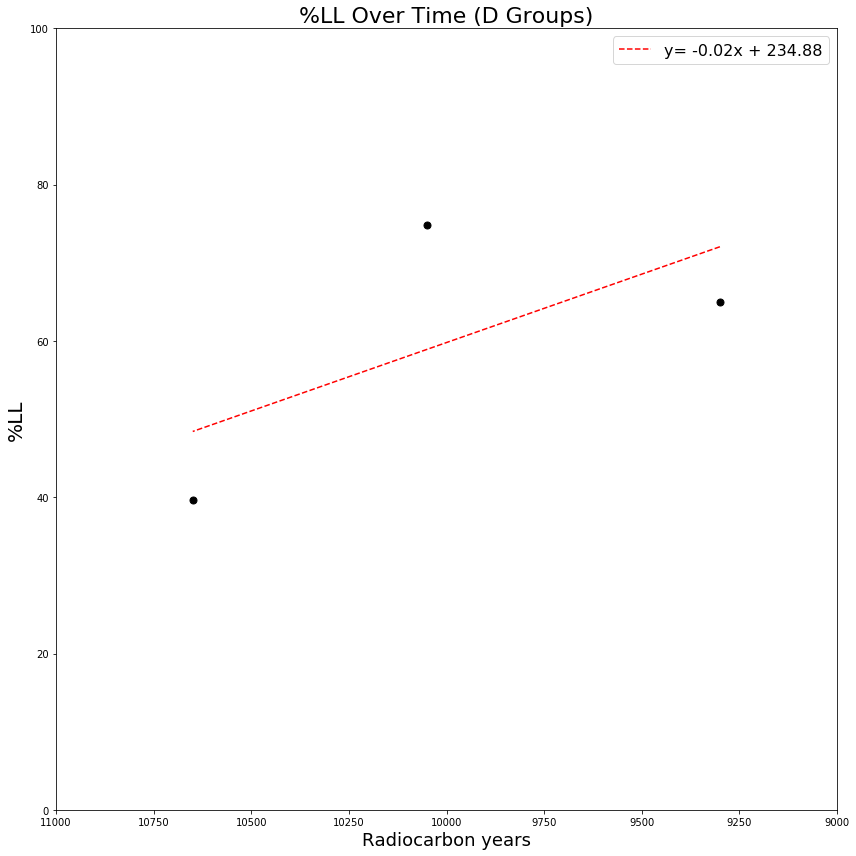

In [43]:
# Plot the D Groups %LL over time
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(Dgrp_df.D_dates, Dgrp_df.D_LL, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, Dgrp_df.D_dates, Dgrp_df.D_LL)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(Dgrp_df.D_dates, linear(Dgrp_df.D_dates, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))
ax1.set_xlim(11000,9000)
ax1.set_ylim(0,100)

ax1.set_title("%LL Over Time (D Groups)", fontsize=22)
ax1.set_ylabel("%LL",  fontsize=20)
ax1.set_xlabel("Radiocarbon years",  fontsize=18)
ax1.legend(loc='best', fontsize=16)

fig.tight_layout()
   
plt.savefig('D LL.png')

In [44]:
D_pearson_r, D_pearson_r_pval = stats.pearsonr(D_LL, D_dates)
print("D Pearson's r:          ", str(round(D_pearson_r, 3)))
print("D Pearson's r, p value: ", str(round(D_pearson_r_pval, 4)))
print("--------------------------------")

D Pearson's r:           -0.652
D Pearson's r, p value:  0.548
--------------------------------


In [45]:
D_spearman_r, D_spearman_r_pval = stats.spearmanr(D_LL, D_dates)
print("D Spearman's r:          ", str(round(D_spearman_r, 3)))
print("D Spearman's r, p value: ", str(round(D_spearman_r_pval, 4)))

D Spearman's r:           -0.5
D Spearman's r, p value:  0.6667


In [46]:
#fit multiple linear regression model
D_model = ols('D_LL ~ D_dates', data=Dgrp_df).fit()

#view model summary
print(D_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   D_LL   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                 -0.150
Method:                 Least Squares   F-statistic:                    0.7389
Date:                Thu, 16 Dec 2021   Prob (F-statistic):              0.548
Time:                        10:47:05   Log-Likelihood:                -11.518
No. Observations:                   3   AIC:                             27.04
Df Residuals:                       1   BIC:                             25.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    234.8820    203.992      1.151      0.4

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


### Running the same regression and stats tests using calender years instead of radiocarbon years.

In [47]:
D_LL = [65.0, 74.8, 39.6]
D_caldates = [8647, 9816, 10786]
#create dataset
Dcal_df = pd.DataFrame({'D_LL': D_LL,
                     'D_dates': D_caldates})
#view dataset
Dcal_df

,D_LL,D_dates
0,65.0,8647
1,74.8,9816
2,39.6,10786


slope = -0.01 (+/-) 0.01
y-intercept = 168.90 (+/-) 124.78


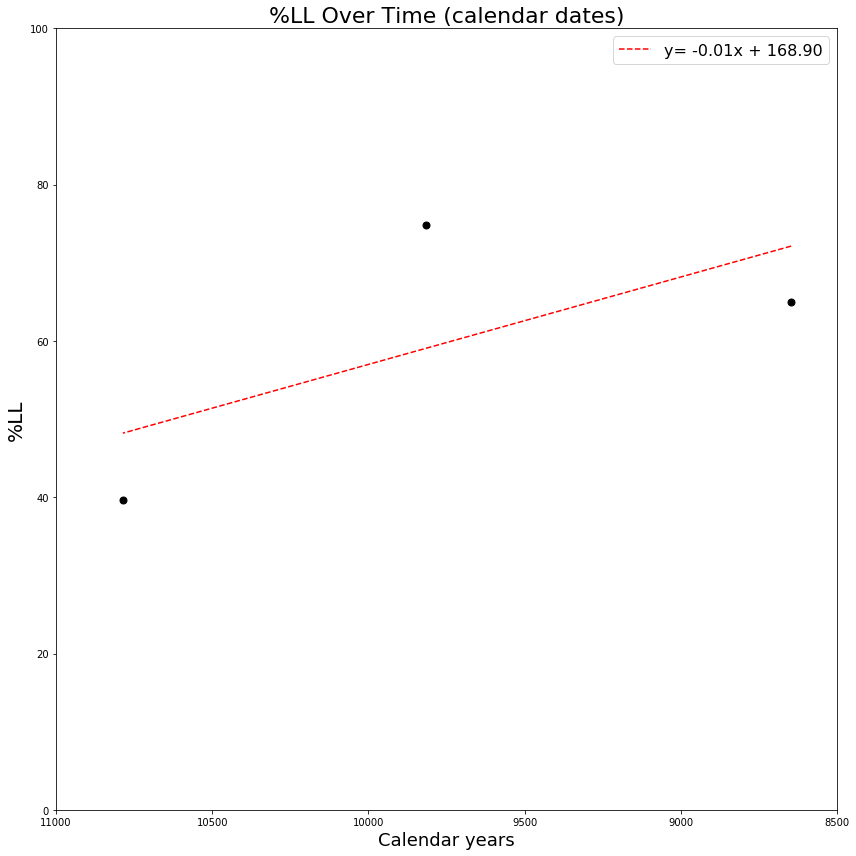

In [48]:

fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(Dcal_df.D_dates, Dcal_df.D_LL, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, Dcal_df.D_dates, Dcal_df.D_LL)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(Dcal_df.D_dates, linear(Dcal_df.D_dates, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(11000,8500)
ax1.set_ylim(0,100)

ax1.set_title("%LL Over Time (calendar dates)", fontsize=22)
ax1.set_ylabel("%LL",  fontsize=20)
ax1.set_xlabel("Calendar years",  fontsize=18)
ax1.legend(loc='best', fontsize=16)

fig.tight_layout()
   
plt.savefig('Dcal LL.png')

In [49]:
D_pearson_r, D_pearson_r_pval = stats.pearsonr(D_LL, D_caldates)
print("D Pearson's r:          ", str(round(D_pearson_r, 3)))
print("D Pearson's r, p value: ", str(round(D_pearson_r_pval, 4)))
print("--------------------------------")

D Pearson's r:           -0.66
D Pearson's r, p value:  0.5414
--------------------------------


In [50]:
D_spearman_r, D_spearman_r_pval = stats.spearmanr(D_LL, D_caldates)
print("D Spearman's r:          ", str(round(D_spearman_r, 3)))
print("D Spearman's r, p value: ", str(round(D_spearman_r_pval, 4)))

D Spearman's r:           -0.5
D Spearman's r, p value:  0.6667


In [51]:
#fit multiple linear regression model
D_model = ols('D_LL ~ D_caldates', data=Dgrp_df).fit()

#view model summary
print(D_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   D_LL   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                 -0.130
Method:                 Least Squares   F-statistic:                    0.7706
Date:                Thu, 16 Dec 2021   Prob (F-statistic):              0.541
Time:                        10:47:20   Log-Likelihood:                -11.490
No. Observations:                   3   AIC:                             26.98
Df Residuals:                       1   BIC:                             25.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.8989    124.781      1.354      0.4

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


## Results after removing the Flat Hills outlier

In [68]:
# rank order of index list by Discoverability
d1_dlist = np.array([1,14,6,2,5,10,4,12,11,15,9,7,8,13,3])
d1_olist = np.array([3,13,6,2,5,9,4,13,13,7.5,7.5,10,13,13,1])

d2_dlist = np.array([2,14,6,3,5, 10,4,12,11,15,8,7,9,13,1])
d2_olist = np.array([12,12,3.5,2,12,6.5,6.5,12,12,12,3.5,6.5,12,6.5,1])

d3_dlist = np.array([1,14,6,3,4,10,5,12,11,15,8,7,9,13,2])
d3_olist = np.array([8,8,4.5,2,4.5,13,8,13,13,13,3,13,8,8,1])

In [53]:
d1o_pearson_r, d1o_pearson_r_pval = stats.pearsonr(d1_dlist, d1_olist)
print("D1 Pearson's r:          ", str(round(d1o_pearson_r, 3)))
print("D1 Pearson's r, p value: ", str(round(d1o_pearson_r_pval, 8)))
d1o_pearson_coeff = d1o_pearson_r ** 2
print("D1 coeff:                ", round(d1o_pearson_coeff,3))
print("--------------------------------")

d2o_pearson_r, d2o_pearson_r_pval = stats.pearsonr(d2_dlist, d2_olist)
print("D2 Pearson's r:          ", str(round(d2o_pearson_r, 3)))
print("D2 Pearson's r, p value: ", str(round(d2o_pearson_r_pval, 8)))
d2o_pearson_coeff = d2o_pearson_r ** 2
print("D2 coeff:                ", round(d2o_pearson_coeff,3))
print("--------------------------------")

d3o_pearson_r, d3o_pearson_r_pval = stats.pearsonr(d3_dlist, d3_olist)
print("D3 Pearson's r:          ", str(round(d3o_pearson_r, 3)))
print("D3 Pearson's r, p value: ", str(round(d3o_pearson_r_pval, 8)))
d3o_pearson_coeff = d3o_pearson_r ** 2
print("D3 coeff:                ", round(d3o_pearson_coeff,3))
print("--------------------------------")

D1 Pearson's r:           0.805
D1 Pearson's r, p value:  0.00029853
D1 coeff:                 0.647
--------------------------------
D2 Pearson's r:           0.506
D2 Pearson's r, p value:  0.05415697
D2 coeff:                 0.256
--------------------------------
D3 Pearson's r:           0.623
D3 Pearson's r, p value:  0.0130548
D3 coeff:                 0.388
--------------------------------


In [54]:
d1o_spearman_r, d1o_spearman_r_pval = stats.spearmanr(d1_dlist, d1_olist)
print("D1 Spearman's r:          ", str(round(d1o_spearman_r, 3)))
print("D1 Spearman's r, p value: ", str(round(d1o_spearman_r_pval, 8)))
d1o_spearman_coeff = d1o_spearman_r ** 2
print("D1 coeff:                 ", round(d1o_spearman_coeff,3))
print("D1 LL:                    ", round((1-d1o_spearman_coeff)*100,1))
print("--------------------------------")

d2o_spearman_r, d2o_spearman_r_pval = stats.spearmanr(d2_dlist, d2_olist)
print("D2 Spearman's r:          ", str(round(d2o_spearman_r, 3)))
print("D2 Spearman's r, p value: ", str(round(d2o_spearman_r_pval, 8)))
d2o_spearman_coeff = d2o_spearman_r ** 2
print("D2 coeff:                 ", round(d2o_spearman_coeff,3))
print("D2 LL:                    ", round((1-d2o_spearman_coeff)*100,1))
print("--------------------------------")


d3o_spearman_r, d3o_spearman_r_pval = stats.spearmanr(d3_dlist, d3_olist)
print("D3 Spearman's r:          ", str(round(d3o_spearman_r, 3)))
print("D3 Spearman's r, p value: ", str(round(d3o_spearman_r_pval, 8)))
d3o_spearman_coeff = d3o_spearman_r ** 2
print("D3 coeff:                 ", round(d3o_spearman_coeff,3))
print("D3 LL:                    ", round((1-d3o_spearman_coeff)*100,1))
print("--------------------------------")

D1 Spearman's r:           0.805
D1 Spearman's r, p value:  0.00029853
D1 coeff:                  0.647
D1 LL:                     35.3
--------------------------------
D2 Spearman's r:           0.506
D2 Spearman's r, p value:  0.05415697
D2 coeff:                  0.256
D2 LL:                     74.4
--------------------------------
D3 Spearman's r:           0.623
D3 Spearman's r, p value:  0.0130548
D3 coeff:                  0.388
D3 LL:                     61.2
--------------------------------


In [55]:
d1_dlist = np.array([1,14,6,2,5,10,4,12,11,15,9,7,8,13,3]).reshape((-1, 1))
d1_olist = np.array([3,13,6,2,5,9,4,13,13,7.5,7.5,10,13,13,1]).reshape((-1, 1))

d2_dlist = np.array([2,14,6,3,5,10,4,12,11,15,8,7,9,13,1]).reshape((-1, 1))
d2_olist = np.array([12,12,3.5,2,12,6.5,6.5,12,12,12,3.5,6.5,12,6.5,1]).reshape((-1, 1))

d3_dlist = np.array([1,14,6,3,4,10,5,12,11,15,8,7,9,13,2]).reshape((-1, 1))
d3_olist = np.array([8,8,4.5,2,4.5,13,8,13,13,13,3,13,8,8,1]).reshape((-1, 1))

d1list = list(np.concatenate(d1_dlist).flat)
o1list = list(np.concatenate(d1_olist).flat)
d2list = list(np.concatenate(d2_dlist).flat)
o2list = list(np.concatenate(d2_olist).flat)
d3list = list(np.concatenate(d3_dlist).flat)
o3list = list(np.concatenate(d3_olist).flat)

#create dataset
df = pd.DataFrame({'d1list': d1list,
                   'o1list': o1list,
                   'd2list': d2list,
                   'o2list': o2list,
                   'd3list': d3list,
                   'o3list': o3list})
#view dataset
df

,d1list,o1list,d2list,o2list,d3list,o3list
0,1,3.0,2,12.0,1,8.0
1,14,13.0,14,12.0,14,8.0
2,6,6.0,6,3.5,6,4.5
3,2,2.0,3,2.0,3,2.0
4,5,5.0,5,12.0,4,4.5
5,10,9.0,10,6.5,10,13.0
6,4,4.0,4,6.5,5,8.0
7,12,13.0,12,12.0,12,13.0
8,11,13.0,11,12.0,11,13.0
9,15,7.5,15,12.0,15,13.0


In [56]:
#fit multiple linear regression model
D1o_model = ols('o1list ~ d1list', data=df).fit()

#view model summary
print(D1o_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 o1list   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     23.85
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           0.000299
Time:                        10:49:49   Log-Likelihood:                -35.133
No. Observations:                  15   AIC:                             74.27
Df Residuals:                      13   BIC:                             75.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6857      1.469      1.147      0.2

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


slope = 0.79 (+/-) 0.16
y-intercept = 1.69 (+/-) 1.47


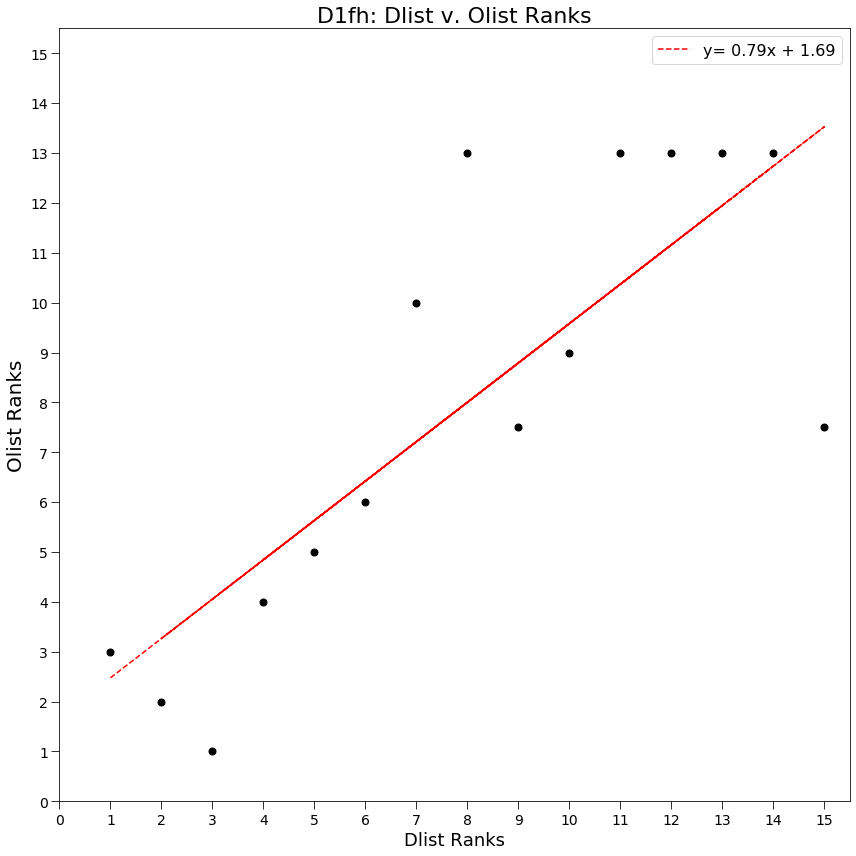

In [57]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(df.d1list, df.o1list, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, df.d1list, df.o1list)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(df.d1list, linear(df.d1list, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,15.5)
ax1.set_ylim(0,15.5)

ax1.set_title("D1fh: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()
    
plt.savefig('D1fh regression chart.png')

In [58]:
#fit multiple linear regression model
D2o_model = ols('o2list ~ d2list', data=df).fit()

#view model summary
print(D2o_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 o2list   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     4.480
Date:                Thu, 16 Dec 2021   Prob (F-statistic):             0.0542
Time:                        10:51:32   Log-Likelihood:                -40.058
No. Observations:                  15   AIC:                             84.12
Df Residuals:                      13   BIC:                             85.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2000      2.040      2.058      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


slope = 0.47 (+/-) 0.22
y-intercept = 4.20 (+/-) 2.04


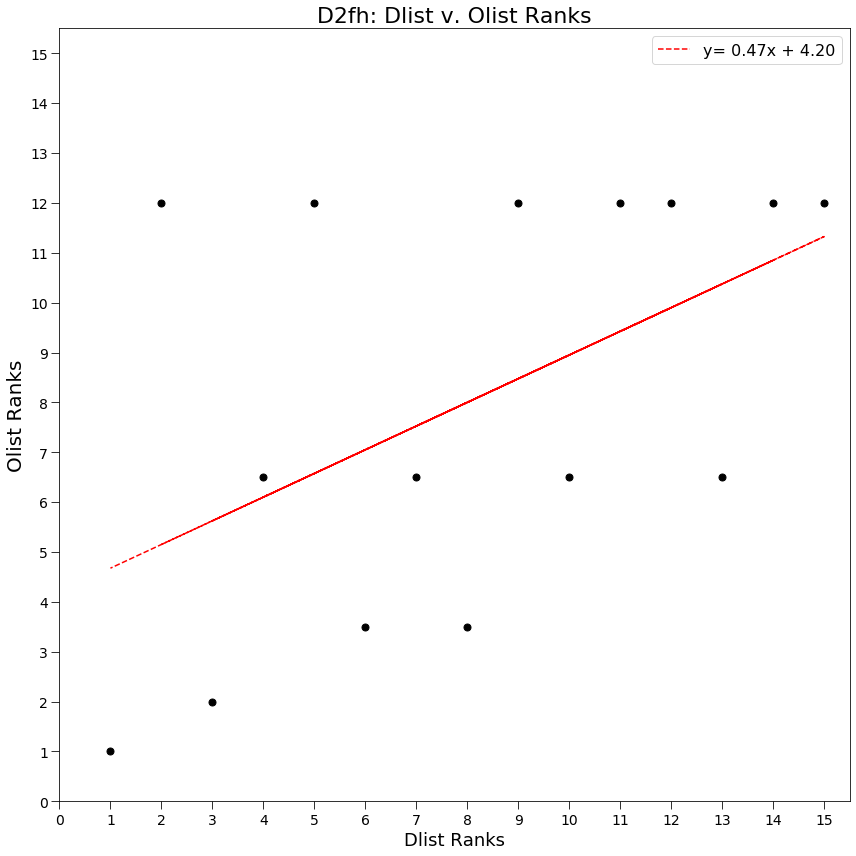

In [59]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(df.d2list, df.o2list, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, df.d2list, df.o2list)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(df.d2list, linear(df.d2list, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,15.5)
ax1.set_ylim(0,15.5)

ax1.set_title("D2fh: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()
    
plt.savefig('D2fh regression chart.png')

In [60]:
#fit multiple linear regression model
D3o_model = ols('o3list ~ d3list', data=df).fit()

#view model summary
print(D3o_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 o3list   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     8.257
Date:                Thu, 16 Dec 2021   Prob (F-statistic):             0.0131
Time:                        10:51:55   Log-Likelihood:                -38.976
No. Observations:                  15   AIC:                             81.95
Df Residuals:                      13   BIC:                             83.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2000      1.898      1.686      0.1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


slope = 0.60 (+/-) 0.21
y-intercept = 3.20 (+/-) 1.90


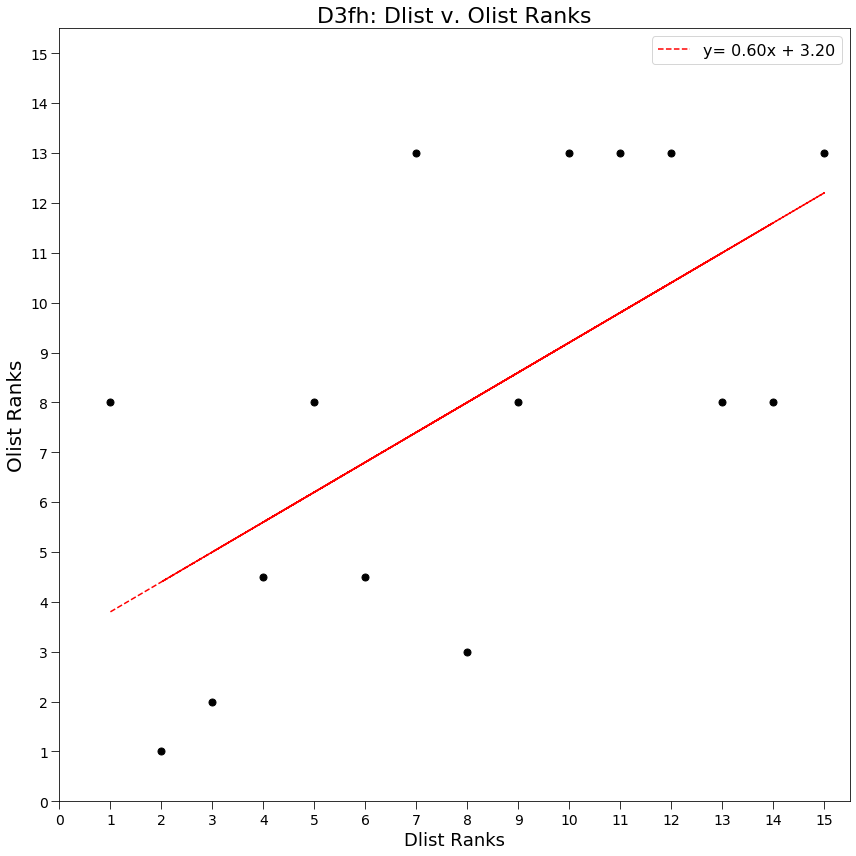

In [61]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(df.d3list, df.o3list, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, df.d3list, df.o3list)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(df.d1list, linear(df.d1list, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,15.5)
ax1.set_ylim(0,15.5)

ax1.set_title("D3fh: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()
    
plt.savefig('D3fh regression chart.png')

In [63]:
Dfh_LL = [35.3, 74.4, 61.2]
Dfh_dates = [10650, 10050, 9300]

#create dataset
Dfhgrp_df = pd.DataFrame({'Dfh_LL': Dfh_LL,
                          'Dfh_dates': Dfh_dates})
#view dataset
Dfhgrp_df

,Dfh_LL,Dfh_dates
0,35.3,10650
1,74.4,10050
2,61.2,9300


slope = -0.02 (+/-) 0.02
y-intercept = 233.74 (+/-) 235.37


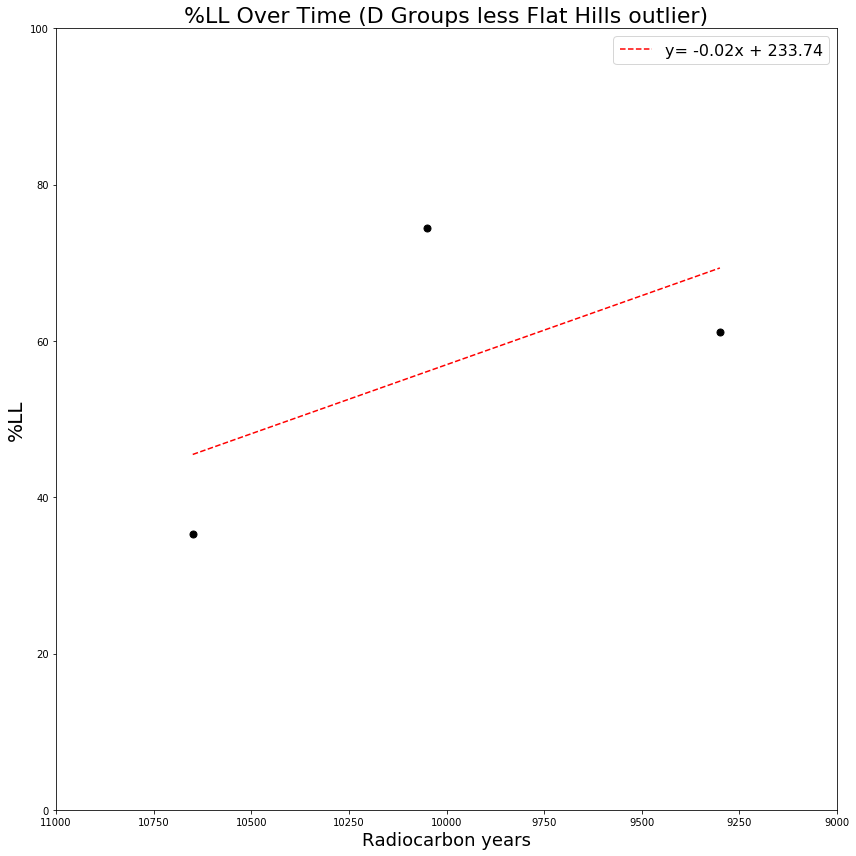

In [64]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(Dfhgrp_df.Dfh_dates, Dfhgrp_df.Dfh_LL, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, Dfhgrp_df.Dfh_dates, Dfhgrp_df.Dfh_LL)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(Dfhgrp_df.Dfh_dates, linear(Dfhgrp_df.Dfh_dates, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(11000,9000)
ax1.set_ylim(0,100)

ax1.set_title("%LL Over Time (D Groups less Flat Hills outlier)", fontsize=22)
ax1.set_ylabel("%LL",  fontsize=20)
ax1.set_xlabel("Radiocarbon years",  fontsize=18)
ax1.legend(loc='best', fontsize=16)

fig.tight_layout()
   
plt.savefig('Dfh LL.png')

In [65]:
#fit multiple linear regression model
Dfh_model = ols('Dfh_LL ~ Dfh_dates', data=Dfhgrp_df).fit()

#view model summary
print(Dfh_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Dfh_LL   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                 -0.277
Method:                 Least Squares   F-statistic:                    0.5658
Date:                Thu, 16 Dec 2021   Prob (F-statistic):              0.589
Time:                        10:54:16   Log-Likelihood:                -11.947
No. Observations:                   3   AIC:                             27.89
Df Residuals:                       1   BIC:                             26.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    233.7426    235.368      0.993      0.5

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


In [66]:
Dfh_pearson_r, Dfh_pearson_r_pval = stats.pearsonr(Dfh_LL, Dfh_dates)
print("Dfh Pearson's r:          ", str(round(Dfh_pearson_r, 3)))
print("Dfh Pearson's r, p value: ", str(round(Dfh_pearson_r_pval, 4)))
print("--------------------------------")

Dfh Pearson's r:           -0.601
Dfh Pearson's r, p value:  0.5894
--------------------------------


In [67]:
Dfh_spearman_r, Dfh_spearman_r_pval = stats.spearmanr(Dfh_LL, Dfh_dates)
print("Dfh Spearman's r:          ", str(round(Dfh_spearman_r, 3)))
print("Dfh Spearman's r, p value: ", str(round(Dfh_spearman_r_pval, 4)))

Dfh Spearman's r:           -0.5
Dfh Spearman's r, p value:  0.6667
